<a href="https://colab.research.google.com/github/sajithamma/ml-days/blob/main/SalesML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [2]:
data = pd.read_csv('train.csv', parse_dates=['date'])




In [3]:
print(data.columns)


Index(['date', 'store', 'item', 'sales'], dtype='object')


In [4]:
data.set_index('date', inplace=True)

data.head(10)

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
2013-01-06,1,1,12
2013-01-07,1,1,10
2013-01-08,1,1,9
2013-01-09,1,1,12


In [5]:
data['sales_diff'] =data['sales'].diff()

data.dropna(inplace=True)



In [6]:
data

,store,item,sales,sales_diff
date,,,,
2013-01-02,1,1,11,-2.0
2013-01-03,1,1,14,3.0
2013-01-04,1,1,13,-1.0
2013-01-05,1,1,10,-3.0
2013-01-06,1,1,12,2.0
...,...,...,...,...
2015-08-22,4,7,66,-11.0
2015-08-23,4,7,79,13.0
2015-08-24,4,7,61,-18.0


In [7]:
def create_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [8]:
supervised_data = create_supervised(data['sales_diff'], 12)

supervised_data

,sales_diff,sales_diff,sales_diff,sales_diff,sales_diff,sales_diff,sales_diff,sales_diff,sales_diff,sales_diff,sales_diff,sales_diff,sales_diff
date,,,,,,,,,,,,,
2013-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
2013-01-03,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2013-01-04,3.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2013-01-05,-1.0,3.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0
2013-01-06,-3.0,-1.0,3.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-22,20.0,4.0,-10.0,19.0,-49.0,15.0,3.0,-12.0,28.0,-6.0,15.0,-41.0,-11.0
2015-08-23,-11.0,20.0,4.0,-10.0,19.0,-49.0,15.0,3.0,-12.0,28.0,-6.0,15.0,13.0
2015-08-24,13.0,-11.0,20.0,4.0,-10.0,19.0,-49.0,15.0,3.0,-12.0,28.0,-6.0,-18.0


In [9]:
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]

print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)

Train data shape:  (115993, 13)
Test data shape:  (12, 13)


In [10]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(train_data)



MinMaxScaler(feature_range=(-1, 1))

In [11]:
train_data = scaler.transform(train_data)
train_data

array([[ 0.16788321,  0.16788321,  0.16788321, ...,  0.16788321,
         0.16788321,  0.13868613],
       [ 0.13868613,  0.16788321,  0.16788321, ...,  0.16788321,
         0.16788321,  0.21167883],
       [ 0.21167883,  0.13868613,  0.16788321, ...,  0.16788321,
         0.16788321,  0.15328467],
       ...,
       [ 0.38686131, -0.43065693,  0.45985401, ...,  0.60583942,
        -0.16788321,  0.08029197],
       [ 0.08029197,  0.38686131, -0.43065693, ...,  0.15328467,
         0.60583942,  0.57664234],
       [ 0.57664234,  0.08029197,  0.38686131, ..., -0.43065693,
         0.15328467, -0.00729927]])

In [12]:
test_data = scaler.transform(test_data)
test_data

array([[-0.00729927,  0.57664234,  0.08029197,  0.38686131, -0.43065693,
         0.45985401, -0.03649635, -0.06569343,  0.94160584,  0.02189781,
         0.29927007, -0.43065693,  0.21167883],
       [ 0.21167883, -0.00729927,  0.57664234,  0.08029197,  0.38686131,
        -0.43065693,  0.45985401, -0.03649635, -0.06569343,  0.94160584,
         0.02189781,  0.29927007,  0.38686131],
       [ 0.38686131,  0.21167883, -0.00729927,  0.57664234,  0.08029197,
         0.38686131, -0.43065693,  0.45985401, -0.03649635, -0.06569343,
         0.94160584,  0.02189781, -0.54744526],
       [-0.54744526,  0.38686131,  0.21167883, -0.00729927,  0.57664234,
         0.08029197,  0.38686131, -0.43065693,  0.45985401, -0.03649635,
        -0.06569343,  0.94160584,  0.44525547],
       [ 0.44525547, -0.54744526,  0.38686131,  0.21167883, -0.00729927,
         0.57664234,  0.08029197,  0.38686131, -0.43065693,  0.45985401,
        -0.03649635, -0.06569343,  0.02189781],
       [ 0.02189781,  0.445255

In [13]:
x_train, y_train = train_data[:, 1:], train_data[:, 0]
x_test, y_test = test_data[:, 1:], test_data[:, 0]

In [14]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (115993, 12)
y_train shape:  (115993,)
x_test shape:  (12, 12)
y_test shape:  (12,)


In [15]:
sales_dates = data.index[-12:].to_series().reset_index(drop=True)

sales_dates

,date
0,2015-08-15
1,2015-08-16
2,2015-08-17
3,2015-08-18
4,2015-08-19
5,2015-08-20
6,2015-08-21
7,2015-08-22
8,2015-08-23
9,2015-08-24


In [16]:
predict_df = pd.DataFrame(sales_dates, columns=['date'])
predict_df

,date
0,2015-08-15
1,2015-08-16
2,2015-08-17
3,2015-08-18
4,2015-08-19
5,2015-08-20
6,2015-08-21
7,2015-08-22
8,2015-08-23
9,2015-08-24


In [17]:
# Actual sales for the last 13 months
actual_sales = data['sales'].values[-12:]
actual_sales

array([78, 93, 44, 63, 53, 57, 77, 66, 79, 61, 64, 66])

In [18]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()


In [19]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [20]:
lr_predict = lr_model.predict(x_test)


In [21]:
import numpy as np

lr_predict = scaler.inverse_transform(np.concatenate((lr_predict.reshape(-1, 1), x_test), axis=1))[:, 0]


In [22]:
lr_predict

array([ -9.43192778,  -6.63129383,  15.81951653, -37.0336204 ,
        26.97219351,   5.95131465,  12.0845093 ,  21.21585733,
        -8.04991712,   9.24011154, -21.46890071,  -0.92924307])

In [23]:
# Calculating predicted sales
result_list = []
for index in range(len(lr_predict)):
    result_list.append(lr_predict[index] + actual_sales[index])

In [24]:
result_list

[68.5680722238026,
 86.36870617432525,
 59.81951652992968,
 25.966379600167343,
 79.97219351277883,
 62.951314654143594,
 89.08450929791901,
 87.21585733323798,
 70.95008288426376,
 70.24011153941383,
 42.531099288318934,
 65.07075693290773]

In [25]:
lr_predict_series = pd.Series(result_list, name='linear_prediction')


In [26]:
predict_df = predict_df.join(lr_predict_series)


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_mse = np.sqrt(mean_squared_error(actual_sales, lr_predict))
lr_mae = mean_absolute_error(actual_sales, lr_predict)
lr_r2 = r2_score(actual_sales, lr_predict)


print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression R2 Score: {lr_r2}")

Linear Regression MSE: 70.66109703260592
Linear Regression MAE: 66.10511666906596
Linear Regression R2 Score: -30.072676056640056


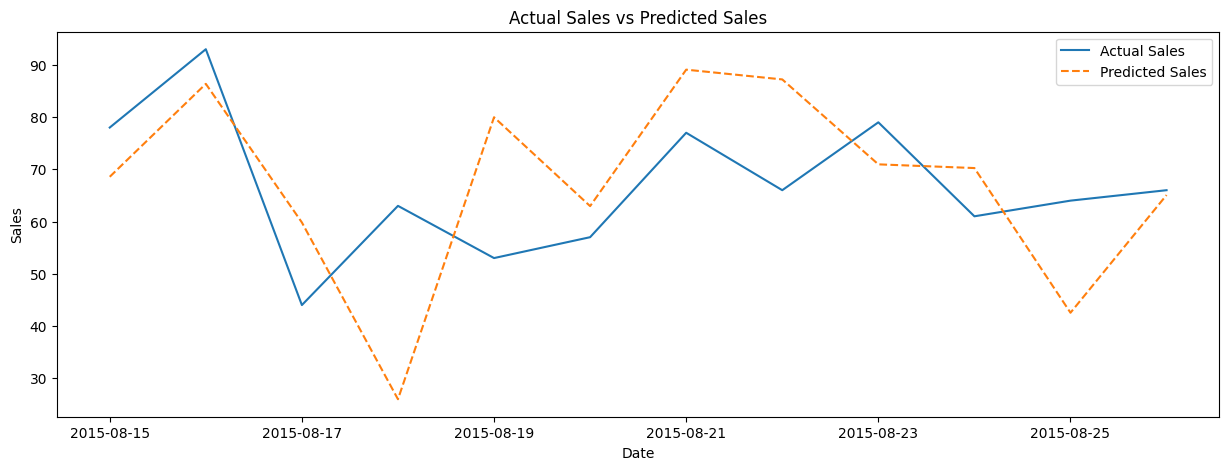

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(data.index[-12:], actual_sales, label='Actual Sales')
plt.plot(predict_df['date'], predict_df['linear_prediction'], label='Predicted Sales', linestyle='--')
plt.title('Actual Sales vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [29]:
data.index[-12:]

DatetimeIndex(['2015-08-15', '2015-08-16', '2015-08-17', '2015-08-18',
               '2015-08-19', '2015-08-20', '2015-08-21', '2015-08-22',
               '2015-08-23', '2015-08-24', '2015-08-25', '2015-08-26'],
              dtype='datetime64[ns]', name='date', freq=None)

In [30]:
actual_sales

array([78, 93, 44, 63, 53, 57, 77, 66, 79, 61, 64, 66])

In [ ]:
predict_df['date']

In [32]:
predict_df['linear_prediction']

,linear_prediction
0,68.568072
1,86.368706
2,59.819517
3,25.966380
4,79.972194
5,62.951315
6,89.084509
7,87.215857
8,70.950083
9,70.240112
